In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

from cdo import *
cdo = Cdo()

In [2]:
home = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_soilmoisture_products'

"""Monthly data"""

layer_01_2001_2012_CU_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer1_2001_2012/SoMo.ml_v1_layer1_2001-2012_monthly_CU.nc' , engine = 'netcdf4')
layer_02_2001_2012_CU_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer2_2001_2012/SoMo.ml_v1_layer2_2001-2012_monthly_CU.nc' , engine = 'netcdf4')
layer_03_2001_2012_CU_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer3_2001_2012/SoMo.ml_v1_layer3_2001-2012_monthly_CU.nc' , engine = 'netcdf4')

L1 = np.zeros(120)
L2 = np.zeros(120)
L3 = np.zeros(120)

for i in range(120):
    L1[i] = layer_01_2001_2012_CU_monthly.layer1[i , : , :].mean()
    L2[i] = layer_02_2001_2012_CU_monthly.layer2[i , : , :].mean()
    L3[i] = layer_03_2001_2012_CU_monthly.layer3[i , : , :].mean()
    

Storage = L1 * 0.1 + L2 * 0.2 + L3 * 0.2
Storage = Storage * 1000 #convert to mm

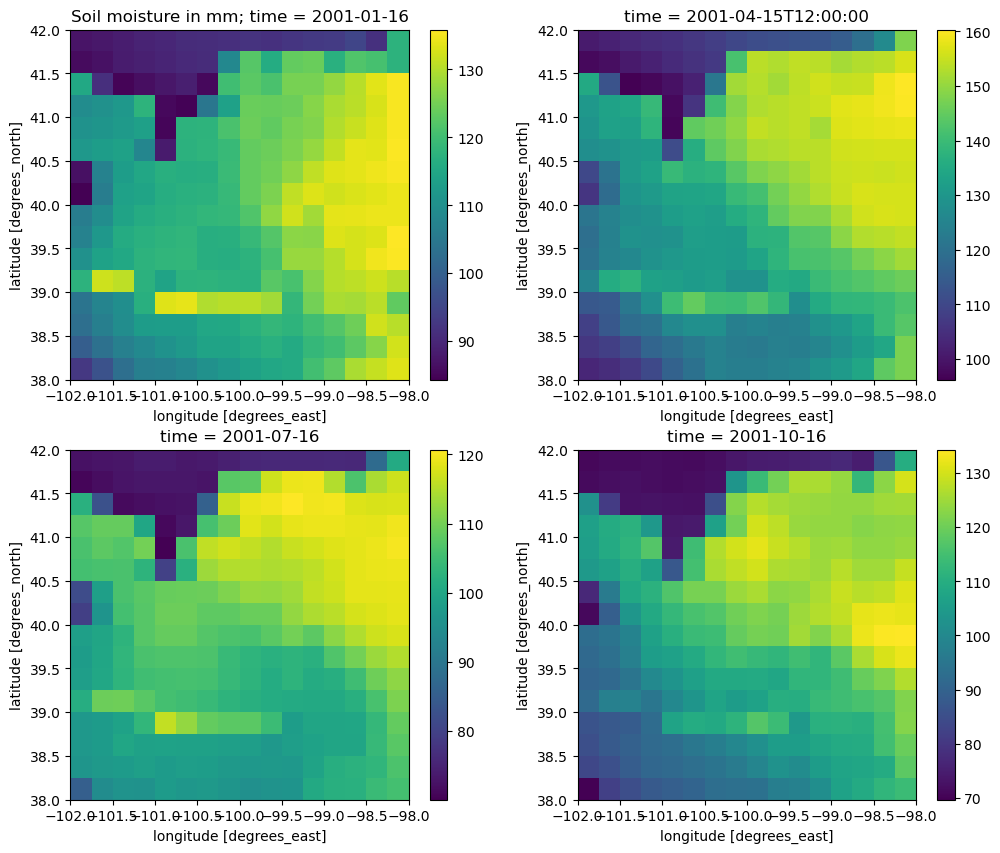

In [3]:
Lay1 = layer_01_2001_2012_CU_monthly.layer1 * 1000
Lay2 = layer_02_2001_2012_CU_monthly.layer2 * 1000
Lay3 = layer_03_2001_2012_CU_monthly.layer3 * 1000

Tlay = 0.1 * Lay1 + 0.2 * Lay2 + 0.2 * Lay3

plt.figure(figsize = (12 , 10))
plt.subplot(221)
Tlay[0].plot()
plt.title('Soil moisture in mm; time = 2001-01-16');
plt.subplot(222)
Tlay[3].plot()
plt.subplot(223)
Tlay[6].plot()
plt.subplot(224)
Tlay[9].plot();

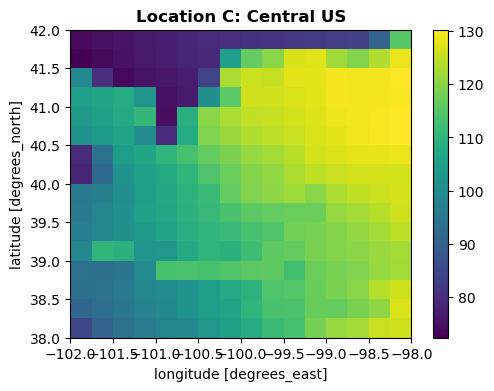

In [5]:
#Average soil moisture distribution over the timeseries

"""Run one time to create timmeans"""

#cdo.timmean(input= home + '/SoMo.ml_v1_layer1_2001_2012/SoMo.ml_v1_layer1_2001-2012_monthly_CU.nc' , output='SoMo.ml_v1_layer1_2001-2012_monthly_CU_timmean.nc')
#cdo.timmean(input= home + '/SoMo.ml_v1_layer2_2001_2012/SoMo.ml_v1_layer2_2001-2012_monthly_CU.nc' , output='SoMo.ml_v1_layer2_2001-2012_monthly_CU_timmean.nc')
#cdo.timmean(input= home + '/SoMo.ml_v1_layer3_2001_2012/SoMo.ml_v1_layer3_2001-2012_monthly_CU.nc' , output='SoMo.ml_v1_layer3_2001-2012_monthly_CU_timmean.nc')

layer_01_2001_2012_CU_monthly = xr.open_dataset('SoMo.ml_v1_layer1_2001-2012_monthly_CU_timmean.nc' , engine = 'netcdf4')
layer_02_2001_2012_CU_monthly = xr.open_dataset('SoMo.ml_v1_layer2_2001-2012_monthly_CU_timmean.nc' , engine = 'netcdf4')
layer_03_2001_2012_CU_monthly = xr.open_dataset('SoMo.ml_v1_layer3_2001-2012_monthly_CU_timmean.nc' , engine = 'netcdf4')

L1 = np.zeros(120)
L2 = np.zeros(120)
L3 = np.zeros(120)

for i in range(120):
    L1 = layer_01_2001_2012_CU_monthly.layer1[:]
    L2 = layer_02_2001_2012_CU_monthly.layer2[:]
    L3 = layer_03_2001_2012_CU_monthly.layer3[:]
    

Storage = L1 * 0.1 + L2 * 0.2 + L3 * 0.2
Storage = Storage * 1000 #convert to mm

plt.figure(figsize = (5.5 , 4))
Storage.plot()
plt.title('Location C: Central US' , fontweight = 'bold');